In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pylab as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import timeseries as ts
import FTSImpl as FTS
import numpy

In [4]:
sarima = ts.TimeSeries((0, 0, 0), (0, 1, 0, 7))

Fecha
2017-01-01      123704
2017-01-02    21209771
2017-01-03    26706072
2017-01-04    29734324
2017-01-05    58392417
Name: Ventas, dtype: int64
Model Fitting Time: 0.031609296798706055
                                SARIMAX Results                                
Dep. Variable:                  Ventas   No. Observations:                  912
Model:             SARIMAX(0, 1, 0, 7)   Log Likelihood                1150.048
Date:                 Sat, 14 Nov 2020   AIC                          -2298.096
Time:                         16:47:05   BIC                          -2293.289
Sample:                     01-01-2017   HQIC                         -2296.260
                          - 07-01-2019                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       

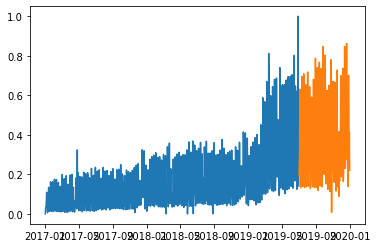

In [5]:
plot(sarima.train_data)
plot(sarima.test_data)

trainMtx = numpy.matrix(sarima.train_data).transpose()
testMtx = numpy.matrix(sarima.test_data).transpose()

In [6]:
# Preparar data para la libreria
train = numpy.array(trainMtx.flatten())[0]
test = numpy.array(testMtx.flatten())[0]

In [7]:
# 10 intervalos para hacer la fuzzificacion
fuzzyTS  = FTS.FuzzyTS(train, 10, 'maximum', 'sets')

['A0 -> A0', 'A0 -> A1', 'A1 -> A1', 'A1 -> A0', 'A1 -> A2', 'A2 -> A1', 'A0 -> A3', 'A3 -> A1', 'A2 -> A2', 'A2 -> A0', 'A0 -> A2', 'A2 -> A3', 'A3 -> A2', 'A1 -> A3', 'A2 -> A4', 'A4 -> A2', 'A1 -> A4', 'A4 -> A3', 'A2 -> A5', 'A5 -> A4', 'A4 -> A1', 'A3 -> A5', 'A2 -> A6', 'A6 -> A4', 'A3 -> A7', 'A7 -> A6', 'A6 -> A2', 'A6 -> A5', 'A5 -> A2', 'A3 -> A6', 'A3 -> A4', 'A1 -> A7', 'A7 -> A3', 'A1 -> A6', 'A6 -> A6', 'A6 -> A3', 'A3 -> A3', 'A7 -> A7', 'A7 -> A2', 'A4 -> A5', 'A5 -> A1', 'A3 -> A9', 'A9 -> A4']
Conventional FTS:
A0 -> A0,A1,A2,A3
A5 -> A1,A2,A4
A4 -> A1,A2,A3,A5
A2 -> A0,A1,A2,A3,A4,A5,A6
A1 -> A0,A1,A2,A3,A4,A6,A7
A6 -> A2,A3,A4,A5,A6
A9 -> A4
A7 -> A2,A3,A6,A7
A3 -> A1,A2,A3,A4,A5,A6,A7,A9



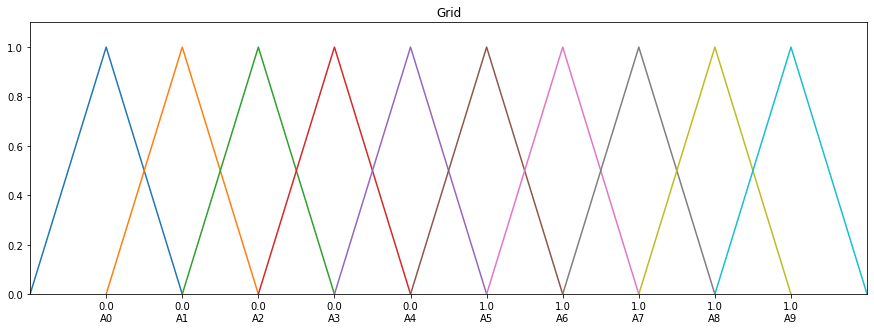

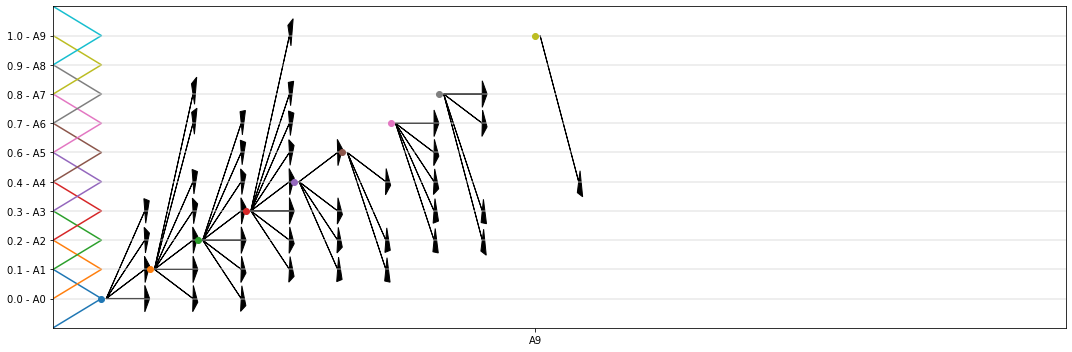

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
fuzzyTS.fs.plot(ax)
#patterns 
print([str(k) for k in fuzzyTS.patterns])
#model
print(fuzzyTS.model)
#modelPlot
from pyFTS.common import Util
Util.plot_rules(fuzzyTS.model, size=[15,5] , rules_by_axis=20)

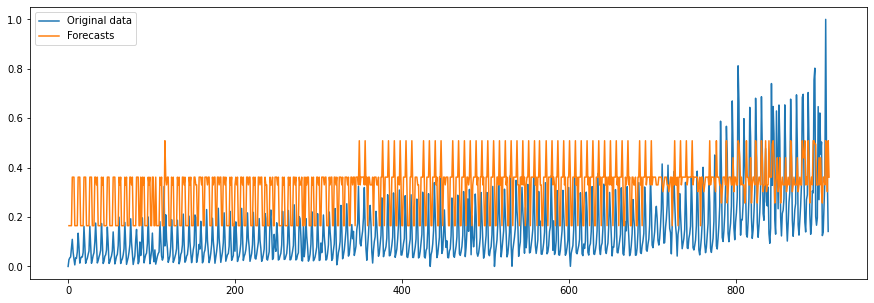

In [9]:
data = train 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

forecasts = fuzzyTS.model.predict(data)
forecasts.insert(0,None)

orig, = plot(data, label="Original data")
pred, = plot(forecasts, label="Forecasts")

legend(handles=[orig, pred])

Terrible el resultado, ahora probemos con mas intervalos de fuzzy

In [14]:
# 20 intervalos para hacer la fuzzificacion
fuzzyTS  = FTS.FuzzyTS(train, 20, 'maximum', 'sets')

['A0 -> A0', 'A0 -> A1', 'A1 -> A1', 'A1 -> A2', 'A2 -> A1', 'A1 -> A0', 'A1 -> A3', 'A3 -> A2', 'A2 -> A0', 'A2 -> A3', 'A3 -> A1', 'A2 -> A4', 'A4 -> A2', 'A0 -> A2', 'A1 -> A4', 'A1 -> A6', 'A6 -> A2', 'A4 -> A4', 'A4 -> A0', 'A4 -> A1', 'A3 -> A4', 'A4 -> A3', 'A2 -> A2', 'A2 -> A5', 'A5 -> A2', 'A0 -> A3', 'A3 -> A0', 'A3 -> A5', 'A5 -> A3', 'A3 -> A3', 'A3 -> A6', 'A6 -> A3', 'A4 -> A6', 'A5 -> A4', 'A5 -> A1', 'A6 -> A4', 'A2 -> A7', 'A7 -> A3', 'A2 -> A6', 'A3 -> A7', 'A7 -> A4', 'A7 -> A2', 'A6 -> A1', 'A7 -> A5', 'A4 -> A8', 'A8 -> A5', 'A5 -> A7', 'A6 -> A5', 'A3 -> A8', 'A4 -> A11', 'A11 -> A7', 'A6 -> A10', 'A10 -> A8', 'A8 -> A2', 'A4 -> A12', 'A12 -> A9', 'A9 -> A3', 'A4 -> A5', 'A5 -> A15', 'A15 -> A12', 'A12 -> A5', 'A5 -> A11', 'A11 -> A8', 'A8 -> A6', 'A5 -> A12', 'A9 -> A4', 'A6 -> A12', 'A6 -> A9', 'A9 -> A5', 'A3 -> A13', 'A13 -> A6', 'A12 -> A10', 'A10 -> A3', 'A2 -> A11', 'A8 -> A4', 'A12 -> A8', 'A8 -> A3', 'A5 -> A5', 'A5 -> A13', 'A13 -> A9', 'A12 -> A13', 'A

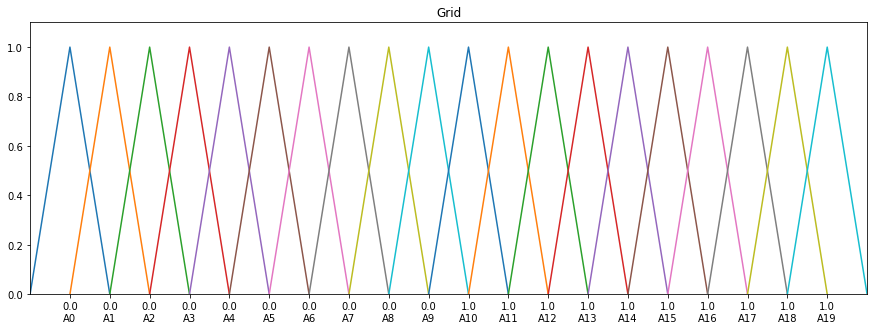

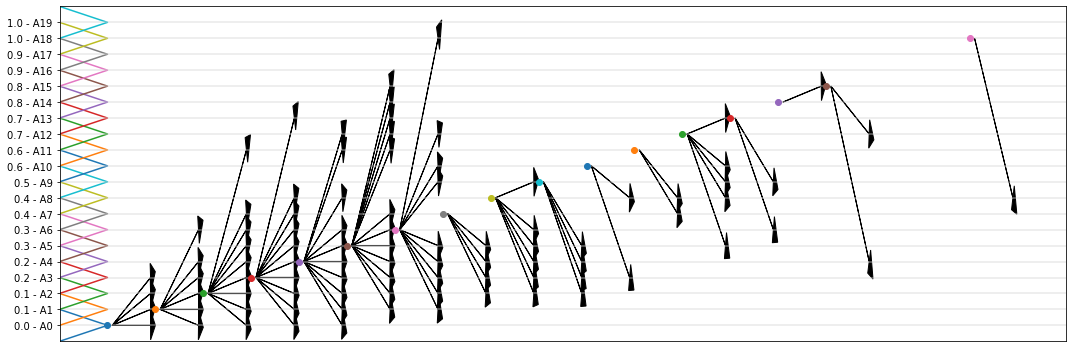

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
fuzzyTS.fs.plot(ax)
#patterns 
print([str(k) for k in fuzzyTS.patterns])
#model
print(fuzzyTS.model)
#modelPlot
from pyFTS.common import Util
Util.plot_rules(fuzzyTS.model, size=[15,5] , rules_by_axis=20)

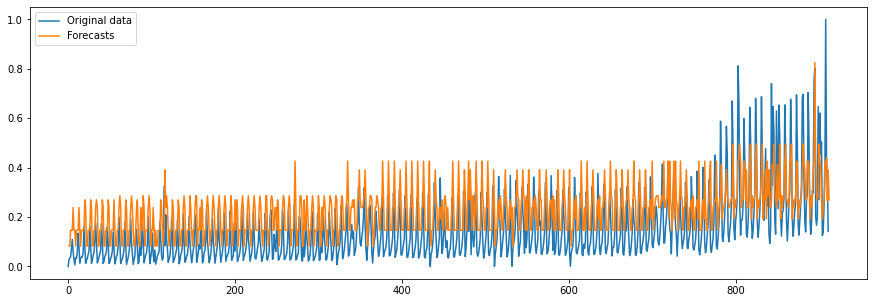

In [16]:
data = train 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

forecasts = fuzzyTS.model.predict(data)
forecasts.insert(0,None)

orig, = plot(data, label="Original data")
pred, = plot(forecasts, label="Forecasts")

legend(handles=[orig, pred])

Mejora considerablemente, mas intervalos.

['A0 -> A1', 'A1 -> A1', 'A1 -> A3', 'A3 -> A4', 'A4 -> A2', 'A2 -> A1', 'A1 -> A0', 'A1 -> A2', 'A2 -> A5', 'A5 -> A3', 'A3 -> A0', 'A2 -> A6', 'A6 -> A3', 'A2 -> A2', 'A2 -> A4', 'A4 -> A6', 'A3 -> A1', 'A6 -> A4', 'A4 -> A0', 'A2 -> A3', 'A3 -> A7', 'A7 -> A4', 'A3 -> A6', 'A2 -> A0', 'A4 -> A5', 'A1 -> A4', 'A4 -> A1', 'A7 -> A3', 'A5 -> A2', 'A2 -> A7', 'A1 -> A12', 'A12 -> A3', 'A3 -> A8', 'A8 -> A4', 'A4 -> A3', 'A8 -> A7', 'A7 -> A1', 'A3 -> A3', 'A4 -> A8', 'A3 -> A9', 'A9 -> A4', 'A6 -> A2', 'A9 -> A5', 'A5 -> A1', 'A8 -> A5', 'A4 -> A7', 'A7 -> A8', 'A1 -> A5', 'A3 -> A2', 'A6 -> A5', 'A8 -> A6', 'A6 -> A1', 'A7 -> A7', 'A1 -> A6', 'A5 -> A4', 'A5 -> A0', 'A4 -> A9', 'A9 -> A6', 'A5 -> A9', 'A3 -> A5', 'A5 -> A6', 'A6 -> A12', 'A12 -> A6', 'A5 -> A7', 'A7 -> A12', 'A7 -> A9', 'A4 -> A4', 'A5 -> A10', 'A10 -> A6', 'A4 -> A11', 'A11 -> A7', 'A7 -> A2', 'A6 -> A11', 'A4 -> A10', 'A10 -> A7', 'A11 -> A6', 'A5 -> A11', 'A11 -> A2', 'A0 -> A2', 'A5 -> A12', 'A12 -> A8', 'A4 -> A13

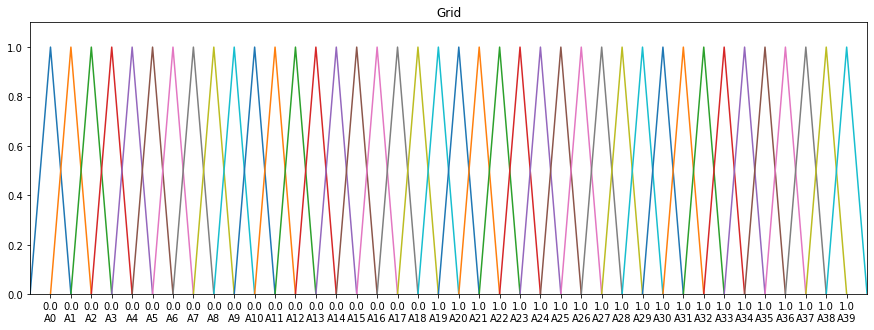

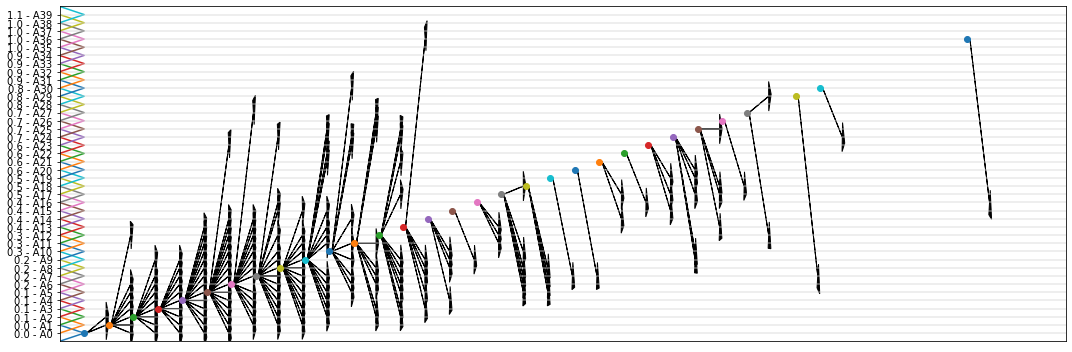

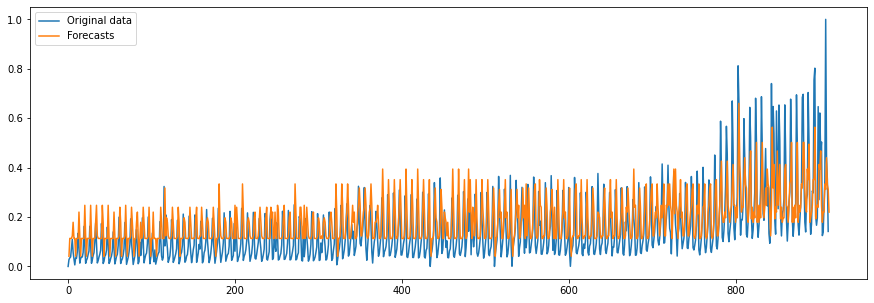

In [20]:
# 40 intervalos para hacer la fuzzificacion
fuzzyTS  = FTS.FuzzyTS(train, 40, 'maximum', 'sets')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
fuzzyTS.fs.plot(ax)
#patterns 
print([str(k) for k in fuzzyTS.patterns])
#model
print(fuzzyTS.model)
#modelPlot
from pyFTS.common import Util
Util.plot_rules(fuzzyTS.model, size=[15,5] , rules_by_axis=40)
data = train 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

forecasts = fuzzyTS.model.predict(data)
forecasts.insert(0,None)

orig, = plot(data, label="Original data")
pred, = plot(forecasts, label="Forecasts")

legend(handles=[orig, pred])

Se sigue acercando

['A0 -> A2', 'A2 -> A3', 'A3 -> A4', 'A4 -> A7', 'A7 -> A10', 'A10 -> A5', 'A5 -> A3', 'A3 -> A1', 'A1 -> A3', 'A3 -> A3', 'A3 -> A5', 'A5 -> A12', 'A12 -> A7', 'A7 -> A1', 'A5 -> A15', 'A15 -> A8', 'A8 -> A1', 'A1 -> A2', 'A4 -> A6', 'A6 -> A15', 'A2 -> A4', 'A4 -> A5', 'A5 -> A9', 'A9 -> A16', 'A16 -> A9', 'A9 -> A1', 'A6 -> A16', 'A4 -> A4', 'A6 -> A14', 'A14 -> A8', 'A6 -> A13', 'A13 -> A7', 'A4 -> A8', 'A8 -> A18', 'A18 -> A10', 'A10 -> A1', 'A7 -> A16', 'A5 -> A8', 'A18 -> A9', 'A9 -> A5', 'A5 -> A1', 'A4 -> A10', 'A10 -> A14', 'A14 -> A7', 'A2 -> A9', 'A9 -> A4', 'A7 -> A18', 'A18 -> A8', 'A3 -> A6', 'A6 -> A12', 'A12 -> A4', 'A4 -> A2', 'A2 -> A6', 'A6 -> A1', 'A5 -> A5', 'A5 -> A16', 'A16 -> A10', 'A10 -> A4', 'A3 -> A29', 'A29 -> A8', 'A8 -> A19', 'A19 -> A10', 'A10 -> A7', 'A7 -> A2', 'A7 -> A17', 'A17 -> A11', 'A11 -> A1', 'A5 -> A7', 'A17 -> A9', 'A19 -> A9', 'A9 -> A2', 'A2 -> A2', 'A7 -> A19', 'A1 -> A4', 'A6 -> A8', 'A19 -> A18', 'A18 -> A2', 'A8 -> A6', 'A6 -> A17', 'A

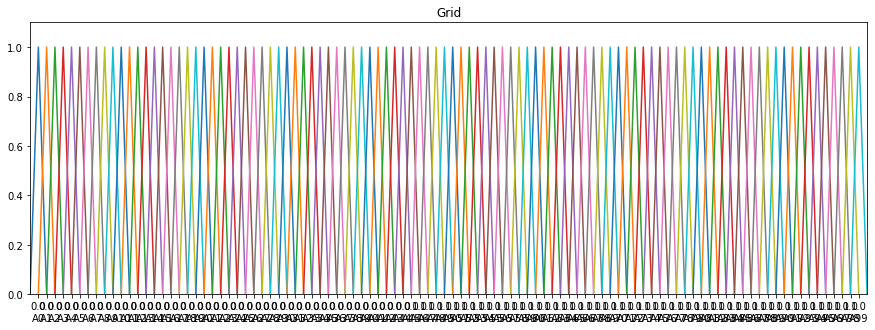

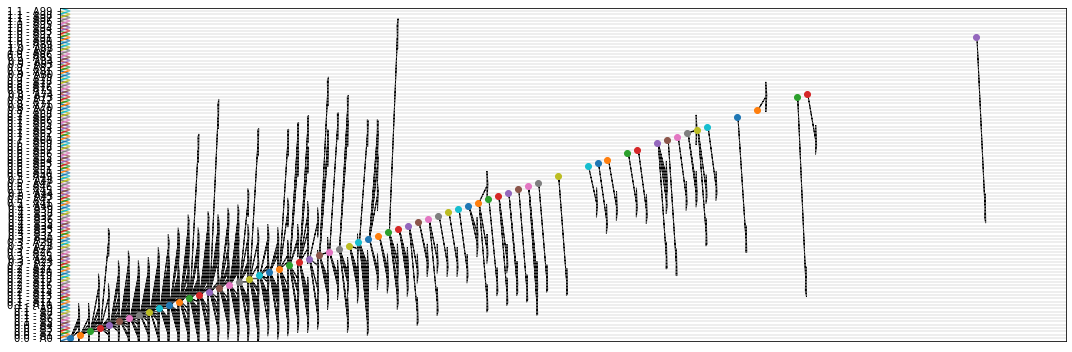

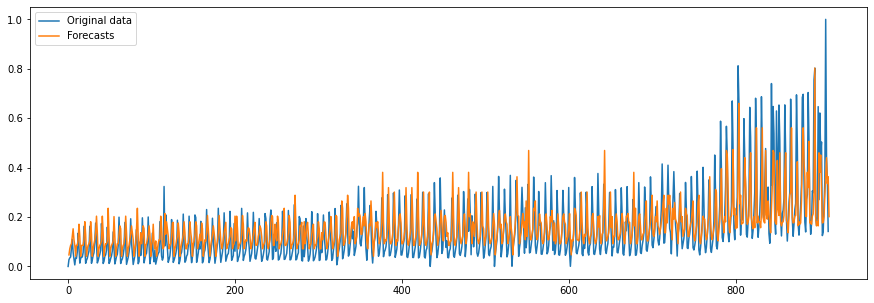

In [21]:
# 100 intervalos para hacer la fuzzificacion
fuzzyTS  = FTS.FuzzyTS(train, 100, 'maximum', 'sets')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
fuzzyTS.fs.plot(ax)
#patterns 
print([str(k) for k in fuzzyTS.patterns])
#model
print(fuzzyTS.model)
#modelPlot
from pyFTS.common import Util
Util.plot_rules(fuzzyTS.model, size=[15,5] , rules_by_axis=100)
data = train 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

forecasts = fuzzyTS.model.predict(data)
forecasts.insert(0,None)

orig, = plot(data, label="Original data")
pred, = plot(forecasts, label="Forecasts")

legend(handles=[orig, pred])

['A0 -> A5', 'A5 -> A6', 'A6 -> A7', 'A7 -> A14', 'A14 -> A20', 'A20 -> A11', 'A11 -> A5', 'A5 -> A1', 'A1 -> A6', 'A6 -> A6', 'A6 -> A11', 'A11 -> A25', 'A25 -> A15', 'A15 -> A2', 'A2 -> A6', 'A7 -> A7', 'A7 -> A10', 'A10 -> A29', 'A29 -> A16', 'A16 -> A2', 'A2 -> A5', 'A6 -> A9', 'A9 -> A11', 'A11 -> A30', 'A30 -> A15', 'A5 -> A8', 'A8 -> A10', 'A10 -> A18', 'A18 -> A32', 'A32 -> A17', 'A17 -> A3', 'A3 -> A4', 'A4 -> A7', 'A7 -> A9', 'A9 -> A12', 'A12 -> A32', 'A32 -> A18', 'A18 -> A2', 'A2 -> A4', 'A12 -> A29', 'A29 -> A17', 'A17 -> A2', 'A2 -> A3', 'A3 -> A6', 'A6 -> A8', 'A8 -> A11', 'A25 -> A13', 'A13 -> A2', 'A9 -> A15', 'A15 -> A36', 'A36 -> A20', 'A20 -> A2', 'A4 -> A6', 'A8 -> A13', 'A13 -> A32', 'A17 -> A1', 'A1 -> A4', 'A7 -> A11', 'A11 -> A16', 'A16 -> A35', 'A35 -> A18', 'A18 -> A10', 'A10 -> A1', 'A1 -> A5', 'A8 -> A19', 'A19 -> A27', 'A27 -> A13', 'A4 -> A18', 'A18 -> A8', 'A8 -> A14', 'A14 -> A36', 'A36 -> A19', 'A19 -> A3', 'A9 -> A10', 'A10 -> A17', 'A17 -> A36', 'A3

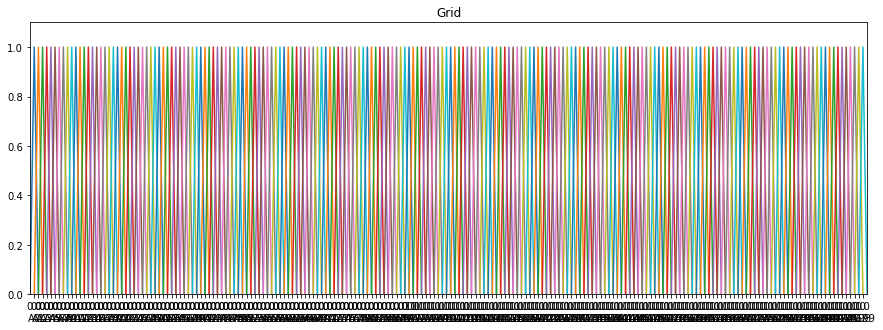

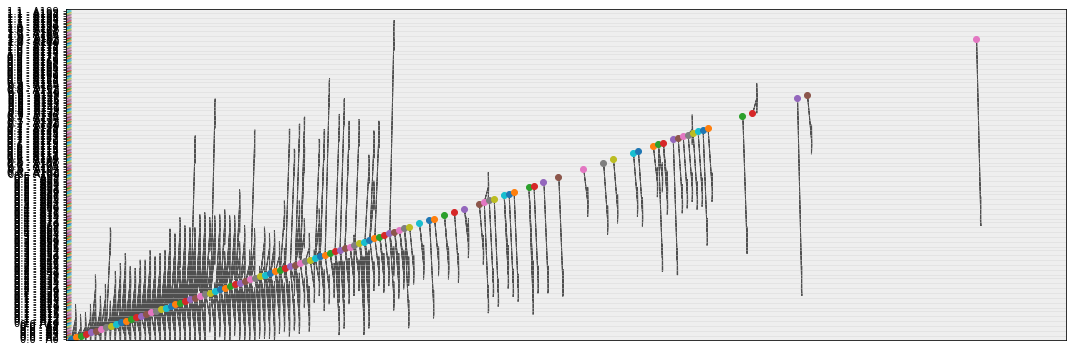

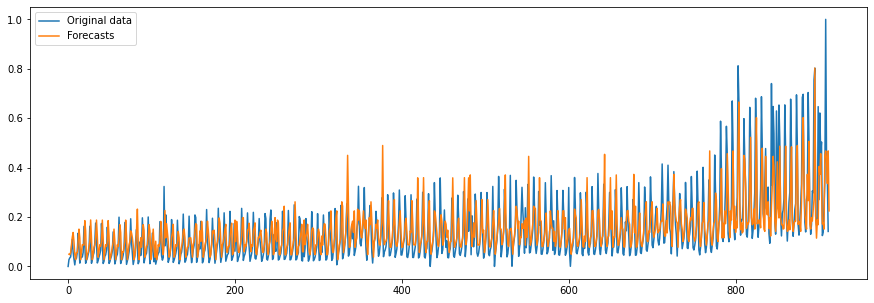

In [22]:
# 200 intervalos para hacer la fuzzificacion
fuzzyTS  = FTS.FuzzyTS(train, 200, 'maximum', 'sets')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
fuzzyTS.fs.plot(ax)
#patterns 
print([str(k) for k in fuzzyTS.patterns])
#model
print(fuzzyTS.model)
#modelPlot
from pyFTS.common import Util
Util.plot_rules(fuzzyTS.model, size=[15,5] , rules_by_axis=200)
data = train 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

forecasts = fuzzyTS.model.predict(data)
forecasts.insert(0,None)

orig, = plot(data, label="Original data")
pred, = plot(forecasts, label="Forecasts")

legend(handles=[orig, pred])

Ya se mueve dentro del intervalo de valores, sigue teniendo alto error, ahora hay que introducir el lag.